<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```

Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.


### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from time import time
import math

a) funcion de f(x)

In [33]:
def calculate_y(x_train_row, weight):
        weights = np.transpose(weight)
        sum = np.dot(weights,x_train_row)
        y_predict = np.where(sum>=0.0,1,0)
        return y_predict

b) funcion de Perceptron

In [34]:
def train(x_train, y_expected, rate):
        numAtributes = x_train.shape[1]
        weights = np.empty(numAtributes)
        #print (self.weights)
        accuracy = []


        acc = 0
        correctos = 0
        cont = 1
        for x_i,y in zip(x_train,y_expected):
            predicted_y = calculate_y(x_i, weights)
            if predicted_y != y:
                if y == 0:
                    y = -1
                y = rate*y 
                weights += y * x_i
            else:
                correctos +=1
            acc = correctos/cont
            accuracy.append(acc)
            cont+=1
        #print (self.weights)
        return (weights,accuracy)
    

c) Demostracion con dataset _breast cancer wisconsin_

Tiempo de ejecución: 0.0099730492 segundos.


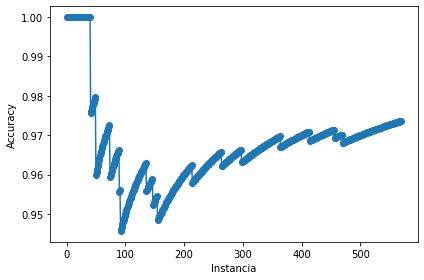

In [38]:
from sklearn.datasets import load_breast_cancer

X_train,y_train = load_breast_cancer(return_X_y=True)
#print (y_train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N = len(X_train)
X_train = np.c_[X_train, np.ones(N)]

start_time = time()
T = train(X_train,y_train, 0.1)

elapsed_time = time() - start_time
print("Tiempo de ejecución: %.10f segundos." % elapsed_time)


plt.plot(range(1, len(T[1]) + 1), T[1], marker='o')
plt.xlabel('Instancia')
plt.ylabel('Accuracy')
 
plt.tight_layout()
plt.show()

d) Forgetron

In [ ]:
def Forgetron(x_train, y_train, K):

e) Forgetron con _breast cancer wisconsin_ y K=10

f) Funcion Sigmoidal

In [68]:
def sigma(epsilon):
        ##MAX exp(x) soportado x=709
        if -epsilon > 709:
            epsilon = -709
        return (1/1+math.exp(-epsilon))

In [69]:
#g
def g(x_train,weights):
    result = sigma(calculate_y(x_train,weights))
    return result

g) Funcion Loss

In [120]:
def loss_function (y,y_predicted):
        if y_predicted == 0:
            log = -8.218407461554972e+307
        else:
            log = math.log(y_predicted)
        if 1-y_predicted == 0:
            log2 = -8.218407461554972e+307
        else :
            log2 = math.log(1-y_predicted)
        return (-y*log)-((1-y)*log2)

h) Derivada de la Loss

Siendo la derivada de $$\frac{\partial g(x^{(i)};w,b)}{\partial w} = \sigma(f)(1-\sigma(f)) x^{(i)}$$ y que la derivada de la funcion loss $\ell (y, \ g(x;w,b))$ es:

$$\frac{\partial\ell (y^{(i)}, \ g(x^{(i)};w,b))}{\partial w} = \sum  y \cdot \frac{1}{g(x^{(i)};w,b)} \cdot \frac{\partial g}{\partial w} - (1-y) \cdot \frac{1}{1 - g(x^{(i)};w,b)} \cdot - \frac{\partial g}{\partial w} $$

que luego de simplificar queda expresada como:

$$\frac{\partial\ell (y^{(i)}, \ g(x^{(i)};w,b))}{\partial w} = (\sigma^{(i)} - y^{(i)})x^{(i)} $$

por lo que la implementacion de la derivada de la funcion Loss es:


In [121]:
def der_loss(x_i,y_i, weights):
    der_eval = 0
    der_eval += (sigma(np.dot(weights.transpose(), x_i))-y_i)*x_i
    return der_eval

i) Perceptron adaptado a _binary cross entropy_ con SGD

In [122]:
def adjust(x_train, y_expected,rate):
    numAtributes = x_train.shape[1]
    weights = np.empty(numAtributes)
    #print (self.weights)
    accuracy = []
    loss_list = []
    

    acc = 0
    correctos = 0
    cont = 1
    for x_i,y in zip(x_train,y_expected):
        predicted_y = calculate_y(x_i, weights)
        if predicted_y != y:
            if y == 0:
                y = -1
            y = rate*y 
            weights += y * x_i - rate* der_loss(x_i, y,weights)
        else:
            correctos +=1
        acc = correctos/cont
        accuracy.append(acc)
        loss_list.append(loss_function(y,predicted_y))
        cont+=1
    #print (self.weights)
    return (weights,accuracy,loss_list)
    

j) Ejecucion con _breast cancer wisconsin_

Tiempo de ejecución: 0.0269241333 segundos.


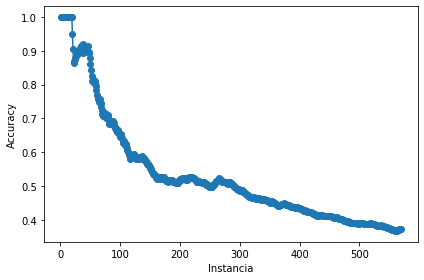

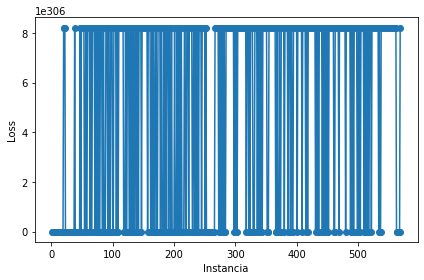

In [124]:
from sklearn.datasets import load_breast_cancer

X_train,y_train = load_breast_cancer(return_X_y=True)
#print (y_train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N = len(X_train)
X_train = np.c_[X_train, np.ones(N)]

start_time = time()
T = train(X_train,y_train, 0.1)

S = adjust(X_train,y_train, 0.1)

elapsed_time = time() - start_time
print("Tiempo de ejecución: %.10f segundos." % elapsed_time)


plt.plot(range(1, len(T[1]) + 1), T[1], marker='o')
plt.xlabel('Instancia')
plt.ylabel('Accuracy')
 
plt.tight_layout()
plt.show()

plt.plot(range(1, len(S[2]) + 1), S[2], marker='o')
plt.xlabel('Instancia')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  